In [1]:
from Net import Net
import torch
import torch.nn as nn
from AuxiliaryFunctions import save_checkpoint, save_recon, fig_to_img,get_plottable_frame
from VideoDataset import VideoDataset
from VideoTransforms import *
from torch.utils.data import DataLoader
from torchvision import transforms
from timeit import default_timer as timer
from datetime import datetime
import matplotlib.pyplot as plt
import os
from pathlib import Path, PureWindowsPath

In [22]:
def train(model,loader,device, num_epochs,directory, batch_size=4, learning_rate=1e-3,model_name='model',checkpoint=[]):
    torch.manual_seed(42)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate, weight_decay=1e-5)
    start_idx = 0
    running_losses=[]
    if isinstance(checkpoint,dict):
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_idx = checkpoint['epoch']
    for epoch in range(start_idx,num_epochs):
        running_loss = 0.0
        for i, data in enumerate(loader, 0):
            optimizer.zero_grad()
            clips = data['clip'].to(device)
            reconstruction = model(clips)
            loss = criterion(clips,reconstruction)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()*clips.size(0)
            if i % 1000 == 0:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, loss.item()))
        
        save_checkpoint(model,optimizer,epoch,running_loss,directory=directory,name=model_name)
        print(running_loss)
        running_losses.append(running_loss)
        save_recon(reconstruction,model_name,epoch,directory)
    return running_losses


In [17]:
directory='G:\My Drive\PhD\cut_swim_samples'#'/Volumes/GoogleDrive/My Drive/PhD/cut_swim_samples'
ds=VideoDataset(directory,num_frames=20, 
                transform=transforms.Compose([Rescale(256),ToTensor()]),swim_sample=False)
dataloader = DataLoader(ds, batch_size=4,
                        shuffle=True, num_workers=4)
len(ds)

5445

In [4]:
batch = next(iter(dataloader))
batch['clip'].shape

In [24]:

path = 'G:\My Drive\PhD\cut_swim_samples\model_outputs\model_091120_20frms_epoch316.pt'
checkpoint=torch.load(path)

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(color_channels=1)
model.to(device)
start = timer()
run_loss=train(model,dataloader,device,num_epochs=500, directory='G:\My Drive\PhD\cut_swim_samples\model_outputs' ,
               model_name='model_091120_20frms',checkpoint=checkpoint)
end = timer()
print(f'elapsed training time {end-start} sec')

[317,     1] loss: 0.013
[317,  1001] loss: 0.007
32.66747664473951
[318,     1] loss: 0.007
[318,  1001] loss: 0.008
32.76726234238595
[319,     1] loss: 0.005
[319,  1001] loss: 0.007
32.813081754837185
[320,     1] loss: 0.007
[320,  1001] loss: 0.007
32.95406344998628
[321,     1] loss: 0.006
[321,  1001] loss: 0.007
33.02774846740067
[322,     1] loss: 0.005
[322,  1001] loss: 0.007
32.853630220051855
[323,     1] loss: 0.005
[323,  1001] loss: 0.009
33.026545672211796
[324,     1] loss: 0.005
[324,  1001] loss: 0.005
32.83890663320199
[325,     1] loss: 0.005
[325,  1001] loss: 0.006
32.80183506314643
[326,     1] loss: 0.004
[326,  1001] loss: 0.006
32.88850161340088
[327,     1] loss: 0.005
[327,  1001] loss: 0.008
32.79689347697422
[328,     1] loss: 0.003
[328,  1001] loss: 0.006
32.79738889122382
[329,     1] loss: 0.005
[329,  1001] loss: 0.006
32.79790577944368
[330,     1] loss: 0.007
[330,  1001] loss: 0.006
32.77079851971939
[331,     1] loss: 0.007
[331,  1001] loss: 0

[437,  1001] loss: 0.005
33.24010368064046
[438,     1] loss: 0.007
[438,  1001] loss: 0.006
33.342025589197874
[439,     1] loss: 0.005
[439,  1001] loss: 0.006
33.45348698878661
[440,     1] loss: 0.009
[440,  1001] loss: 0.005
33.49437249219045
[441,     1] loss: 0.006
[441,  1001] loss: 0.004
33.380631738342345
[442,     1] loss: 0.005
[442,  1001] loss: 0.007
33.31991517636925
[443,     1] loss: 0.005
[443,  1001] loss: 0.006
33.36164956679568
[444,     1] loss: 0.005
[444,  1001] loss: 0.005
33.62923255749047
[445,     1] loss: 0.005
[445,  1001] loss: 0.005
33.69543340243399
[446,     1] loss: 0.006
[446,  1001] loss: 0.006
33.63098529540002
[447,     1] loss: 0.006
[447,  1001] loss: 0.008
33.536597115918994
[448,     1] loss: 0.007
[448,  1001] loss: 0.006
33.406228804495186
[449,     1] loss: 0.005
[449,  1001] loss: 0.005
33.52523221122101
[450,     1] loss: 0.009
[450,  1001] loss: 0.006
33.601014744257554
[451,     1] loss: 0.005
[451,  1001] loss: 0.007
33.66403586510569


In [14]:
device

device(type='cuda')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

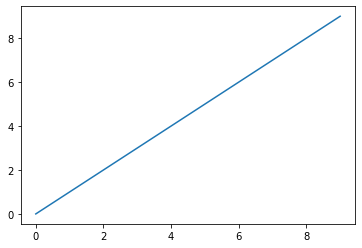

In [3]:
fig=plt.figure()
plt.plot(range(10),range(10))
fig_to_img(fig)

In [13]:
directory='/Volumes/GoogleDrive/My Drive/PhD/regular_vid'#str(Path('G:/My Drive/PhD/regular_vid'))
#'/Volumes/GoogleDrive/My Drive/PhD/cut_swim_samples'
ds=VideoDataset(directory,num_frames=100, 
                transform=transforms.Compose([Rescale(256),ToTensor()]),swim_sample=False)
dataloader = DataLoader(ds, batch_size=1,
                        shuffle=False, num_workers=1)

In [34]:
for root, directories, files in os.walk(directory):
    print(root)
    print(directories)
    for filename in files:
        print(filename)

G:/My Drive/PhD/regular_vid
['New folder']
vid1.mp4
vid1.avi
G:/My Drive/PhD/regular_vid\New folder
[]


In [60]:
frame = ds[0]['clip'][1,:,:,:]
new_h, new_w = int(256*frame.shape[0]/frame.shape[1]), 256


In [61]:
new_w

256

In [74]:
frame = cv2.resize(frame, dsize=(new_w, new_h),
                               interpolation=cv2.INTER_LINEAR)

In [75]:
frame.shape

(452, 256)

In [14]:
batch=next(iter(dataloader))

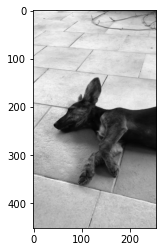

In [15]:
plt.imshow(get_plottable_frame(batch['clip'][0,:,99,:,:]),cmap='gray')

In [28]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 2466-EC75

 Directory of C:\Users\Shir\Documents\GitHub\video_autoencoder

24/11/2020  16:12    <DIR>          .
24/11/2020  16:12    <DIR>          ..
22/11/2020  23:49             1,928 .gitignore
22/11/2020  23:49    <DIR>          .idea
22/11/2020  23:53    <DIR>          .ipynb_checkpoints
23/11/2020  11:09             4,374 AuxiliaryFunctions.py
22/11/2020  23:49             2,538 Net.py
22/11/2020  23:49                79 README.md
24/11/2020  16:12            38,449 TrainingNotebook.ipynb
22/11/2020  23:49             2,859 VideoDataset.py
22/11/2020  23:49             2,280 VideoTransforms.py
24/11/2020  14:10    <DIR>          __pycache__
               7 File(s)         52,507 bytes
               5 Dir(s)  181,220,077,568 bytes free


In [22]:
vid1=cv2.VideoCapture(os.path.join(directory,'vid1.avi'))
fourcc = cv2.VideoWriter_fourcc(*"MJPG")
vid_writer = cv2.VideoWriter(os.path.join(directory,'vid2.avi'), fourcc, 30,
                                     (int(vid1.get(cv2.CAP_PROP_FRAME_WIDTH)), int(vid1.get(cv2.CAP_PROP_FRAME_HEIGHT))), True)
for i in range(150):
    ret,frame = vid1.read()


In [24]:
while ret:
    ret,frame = vid1.read()
    vid_writer.write(frame)
vid1.release()
vid_writer.release()